## **Task 2: Customer Segmentation**

 • Cluster customers into segments based on income and spending score
 
 • Perform scaling and visual exploration of groupings
 
 • Apply K-Means clustering and determine optimal number of clusters
 
 • Visualize clusters using 2D plots

In [2]:
# import necessary libraries 
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt 
%matplotlib inline 

In [3]:
# load the dataset
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


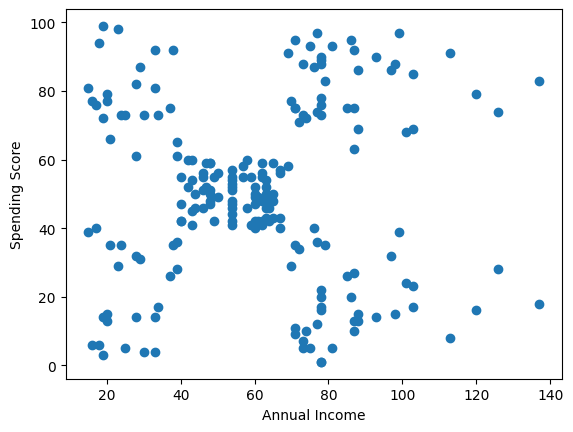

In [4]:
# initial visualization
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [5]:
# Scale features
scaler = MinMaxScaler()

df[['Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(df[['Annual Income (k$)', 'Spending Score (1-100)']])

In [6]:
# perform elbow method to find the number of k.
sse = [] #empty list to store errors
k_rng = range(1,10) # try k = 1 to 9
for k in k_rng:
    km = KMeans(n_clusters=k) #create model with k clusters 
    km.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']]) #train model 
    sse.append(km.inertia_) # save sse for that 

In [7]:
sse

[23.040720326039903,
 14.085982559040602,
 9.059792751166924,
 6.110312266413656,
 3.5834407128859733,
 3.117560140119867,
 2.911389417973963,
 2.3383243222491985,
 2.2311347454801145]

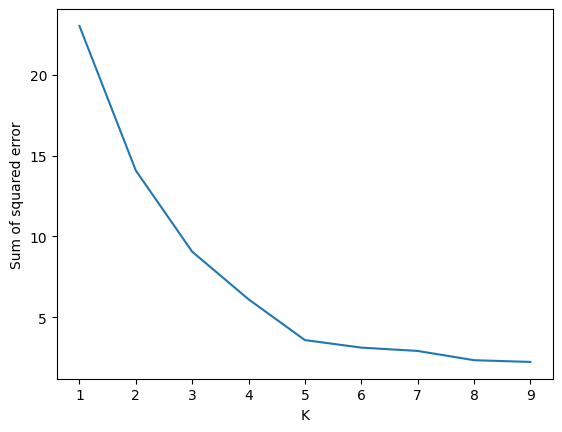

In [8]:
# Plot the graph 
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [9]:
# Apply KMeans clustering 
km = KMeans(n_clusters=5)
y_predicted = km.fit_predict(df[['Annual Income (k$)', 'Spending Score (1-100)']])
y_predicted

array([3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0,
       3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 1, 0, 1, 4, 1, 4, 1,
       0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1], dtype=int32)

In [10]:
# Add the cluster colomn in the dataset 
df['cluster'] = y_predicted 
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,0.000000,0.387755,3
1,2,Male,21,0.000000,0.816327,2
2,3,Female,20,0.008197,0.051020,3
3,4,Female,23,0.008197,0.775510,2
4,5,Female,31,0.016393,0.397959,3


In [11]:
# check centroids
# rows = each cluster center
# columns = feature values (e.g., Income, Spending Score)
km.cluster_centers_

array([[0.33029751, 0.49508692],
       [0.58638083, 0.82783883],
       [0.08792846, 0.79962894],
       [0.09265859, 0.20319432],
       [0.6       , 0.16443149]])

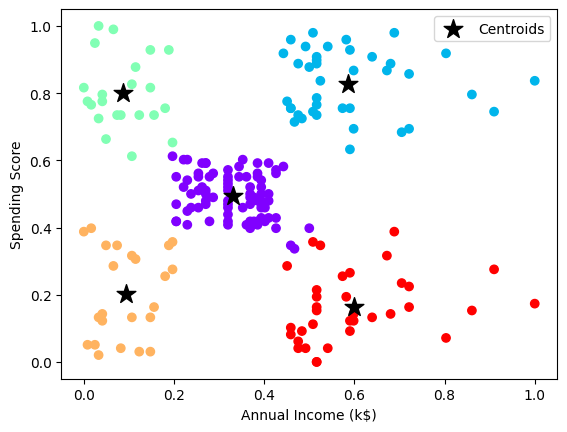

In [12]:
# plot it
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['cluster'], cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', marker='*', s=200, label='Centroids')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.legend()

## **Bonus:**
### *Try different clustering algorithms (e.g., DBSCAN)*

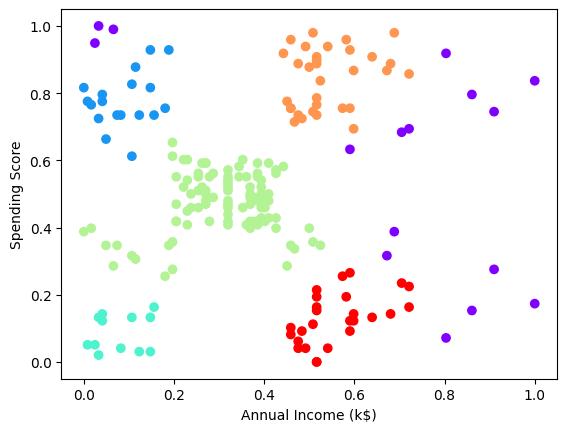

In [129]:
# Using DBSCAN 
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.09, min_samples=5)
clusters = dbscan.fit_predict(df[['Annual Income (k$)', 'Spending Score (1-100)']])

# Add results back to dataframe
df['DBSCAN_clusters'] = clusters 

# Visualization 
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['DBSCAN_clusters'], cmap='rainbow')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.show()

### *Analyze average spending per cluster*

In [130]:
# For KMeans clusters
cluster_avg = df.groupby('cluster')['Spending Score (1-100)'].mean()
print(cluster_avg)

cluster
0    0.495087
1    0.827839
2    0.799629
3    0.203194
4    0.164431
Name: Spending Score (1-100), dtype: float64


In [131]:
# For DBSCAN clusters
cluster_avg = df.groupby('DBSCAN_clusters')['Spending Score (1-100)'].mean()
print(cluster_avg)

DBSCAN_clusters
-1    0.601403
 0    0.777778
 1    0.087585
 2    0.472577
 3    0.843112
 4    0.130298
Name: Spending Score (1-100), dtype: float64
